## Let's dive into the exploratory data analysis (EDA) of the Amazon UK product dataset step-by-step as outlined in your lab instructions. Below is a complete Jupyter Notebook code, including the steps for each part of the analysis.

## Loading and preparing the data

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [6]:
# Load the dataset
df = pd.read_csv(r'C:\Users\User\Documents\IRON HACK DA 2024\IH_labs W5\New folder\lab-eda-univariate\amz_uk_price_prediction_dataset.csv')

In [7]:

# Display the first few rows of the dataset
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  


## Part 1: Understanding Product Categories

## 1 Frequency Tables:

Generate a frequency table for the product category.

Which are the top 5 most listed product categories?

In [8]:
# 1. Frequency Tables
# Generate a frequency table for the product category
category_freq = df['category'].value_counts()
print("Frequency Table for Product Categories:")
print(category_freq)

Frequency Table for Product Categories:
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: category, Length: 296, dtype: int64


In [9]:
# Top 5 most listed product categories
top_5_categories = category_freq.head(5)
print("Top 5 Most Listed Product Categories:")
print(top_5_categories)

Top 5 Most Listed Product Categories:
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: category, dtype: int64


 ## 2. Visualizations

 Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
 
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

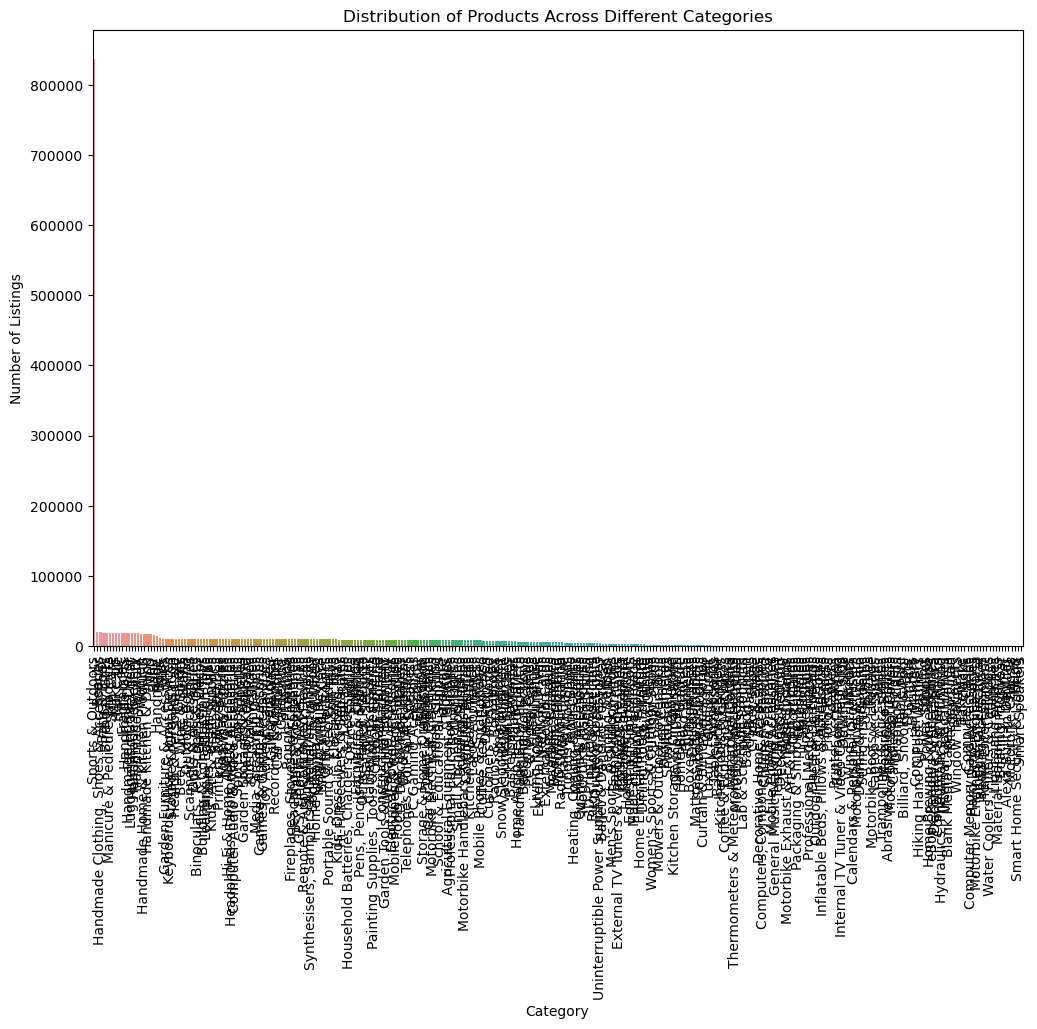

In [10]:
# Bar chart for the distribution of products across different categories
plt.figure(figsize=(12, 8))
sns.barplot(x=category_freq.index, y=category_freq.values)
plt.title('Distribution of Products Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()

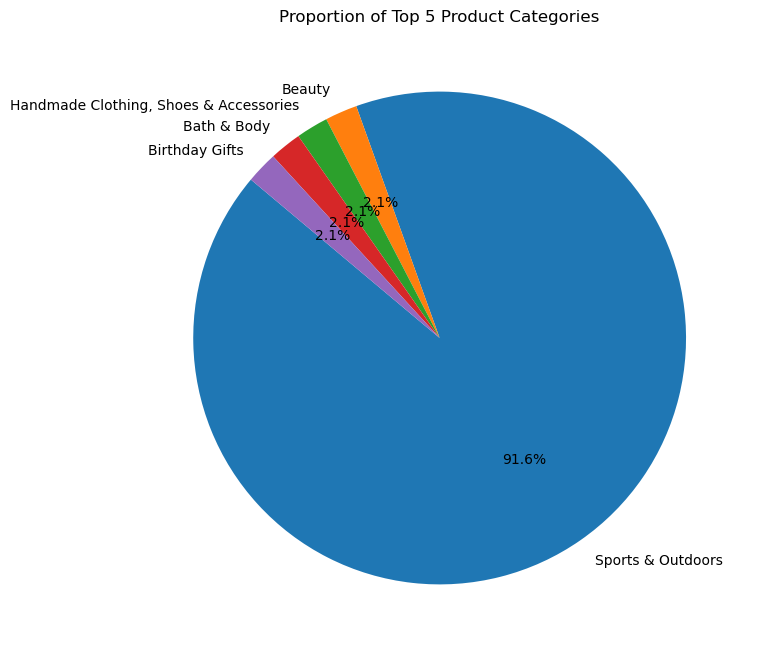

In [11]:
# Pie chart for the top 5 categories
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 5 Product Categories')
plt.show()

## Part 2: Delving into Product Pricing

In [12]:
# 1. Measures of Centrality
# Calculate the mean, median, and mode for the price of products
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

In [13]:
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")


Mean Price: 89.24380943985244
Median Price: 19.09
Mode Price: 9.99


In [15]:
# 2. Measures of Dispersion
# Determine the variance, standard deviation, range, and interquartile range for product price
price_variance = df['price'].var()
price_std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)


print(f"Price Variance: {price_variance}")
print(f"Price Standard Deviation: {price_std_dev}")
print(f"Price Range: {price_range}")
print(f"Price Interquartile Range: {price_iqr}")


Price Variance: 119445.48532256528
Price Standard Deviation: 345.60886175352226
Price Range: 100000.0
Price Interquartile Range: 36.0


# 3. Visualizations

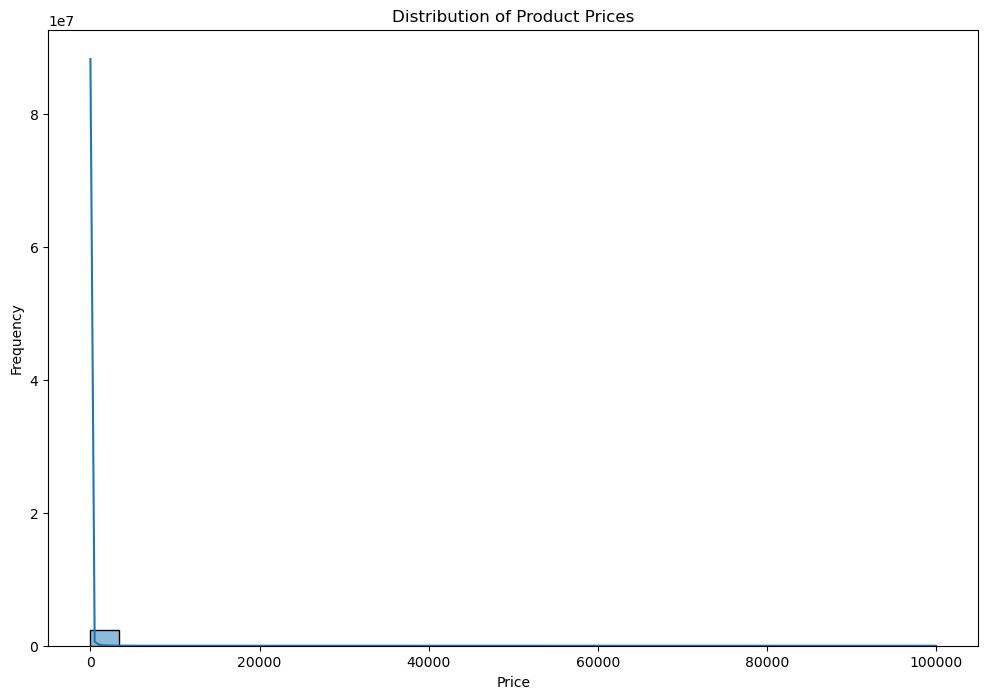

In [16]:
# Histogram for the distribution of product prices
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

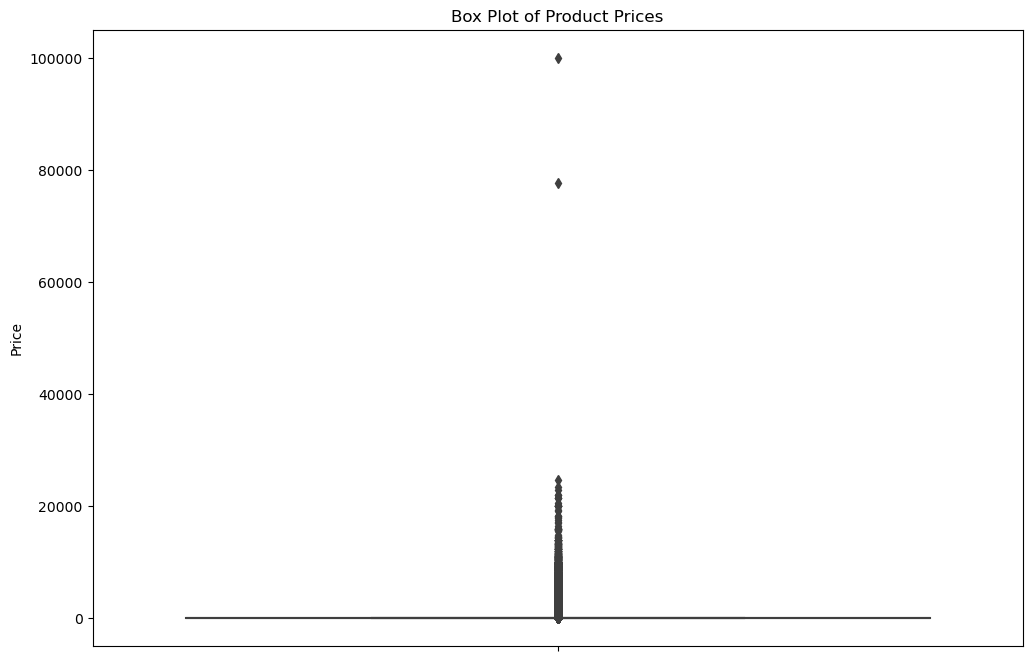

In [18]:

# Box plot for product pricing to showcase the spread and potential outliers
plt.figure(figsize=(12, 8))
sns.boxplot(y=df['price'])
plt.title('Box Plot of Product Prices')
plt.ylabel('Price')
plt.show()

## Part 3: Unpacking Product Ratings

In [21]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [22]:
# Example: if the correct column name is 'product_rating'
df.rename(columns={'stars': 'rating'}, inplace=True)



In [23]:
df.rename

<bound method DataFrame.rename of              uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  rating  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...     4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...     4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...     4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...     4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...     4.6     1881   
...                                                    ...     ...      ...   
2443646  Motorbike Armour, M

In [25]:
# Rename the column 'product_rating' to 'rating'
df = df.rename(columns={'product_rating': 'rating'})

# Verify that the column has been renamed
print(df.columns)


Index(['uid', 'asin', 'title', 'rating', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


# 1. Measures of Centrality

In [26]:
# Ensure the 'rating' column exists in your DataFrame
if 'rating' in df.columns:
    # Calculate mean, median, and mode for product ratings
    mean_rating = df['rating'].mean()
    median_rating = df['rating'].median()
    mode_rating = df['rating'].mode()[0]

    print(f"Mean Rating: {mean_rating}")
    print(f"Median Rating: {median_rating}")
    print(f"Mode Rating: {mode_rating}")
else:
    print("The 'rating' column is not present in the DataFrame.")


Mean Rating: 2.152836472966905
Median Rating: 0.0
Mode Rating: 0.0


# 2. Measures of Dispersion

In [28]:

# 2. Measures of Dispersion
# Determine the variance, standard deviation, and interquartile range for product rating
rating_variance = df['rating'].var()
rating_std_dev = df['rating'].std()
rating_iqr = df['rating'].quantile(0.75) - df['rating'].quantile(0.25)

print(f"Rating Variance: {rating_variance}")
print(f"Rating Standard Deviation: {rating_std_dev}")
print(f"Rating Interquartile Range: {rating_iqr}")

Rating Variance: 4.81743402976196
Rating Standard Deviation: 2.1948653785054697
Rating Interquartile Range: 4.4



# 3. Shape of the Distribution

In [29]:


# Calculate the skewness and kurtosis for the rating column
skewness_rating = skew(df['rating'])
kurtosis_rating = kurtosis(df['rating'])

print(f"Skewness of Rating: {skewness_rating}")
print(f"Kurtosis of Rating: {kurtosis_rating}")


Skewness of Rating: 0.08120730776283354
Kurtosis of Rating: -1.926004642549839


# 4. Visualizations

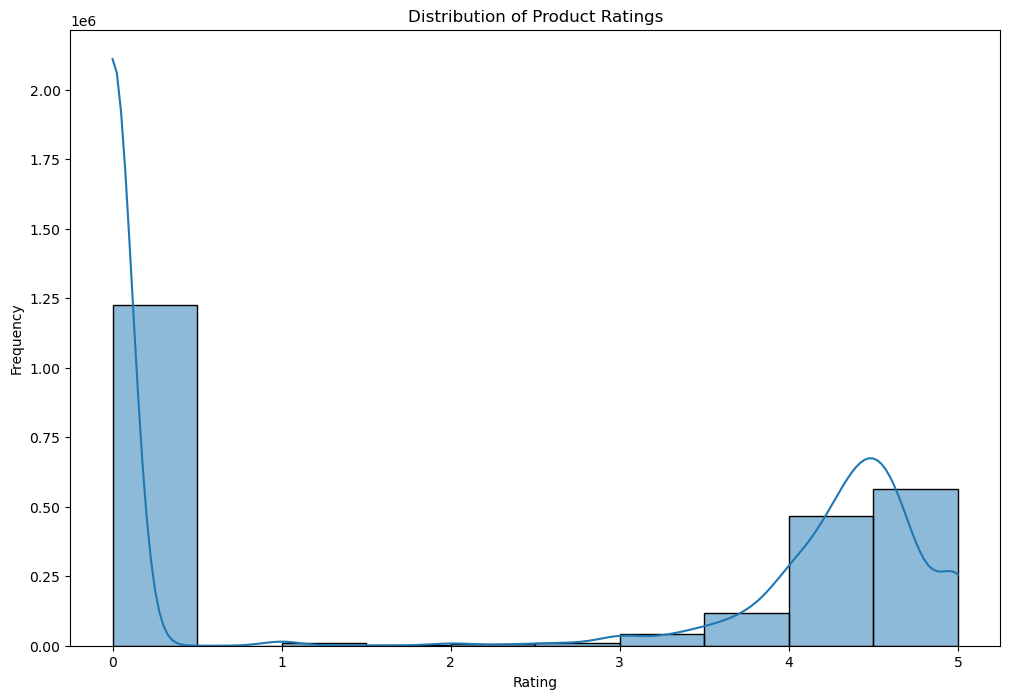

In [31]:
# Histogram for the distribution of product ratings
plt.figure(figsize=(12, 8))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()